In [1]:
import pandas as pd
import matplotlib.pyplot as plt # version 3.5.2

In [2]:
datafood = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 3/fr.openfoodfacts.org.products.csv', sep='\t')
datafood

/var/folders/60/mq_jpp_j34l34j4rjr1bt70m0000gn/T/ipykernel_4850/1521826766.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  datafood = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 3/fr.openfoodfacts.org.products.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#pd.set_option('max_colwidth', None)

In [4]:
datafood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [5]:
# Verification des taux valeurs manquantes par colonne 
Pourcentage = (datafood.isnull().sum() /len(datafood))*100
Pourcentage

code                                            0.007170
url                                             0.007170
creator                                         0.000623
created_t                                       0.000935
created_datetime                                0.002806
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
product_name                                    5.537266
generic_name                                   83.541269
quantity                                       67.322896
packaging                                      75.384385
packaging_tags                                 75.384073
brands                                          8.857382
brands_tags                                     8.859876
categories                                     73.685359
categories_tags                                73.691906
categories_fr                                  73.685047
origins                        

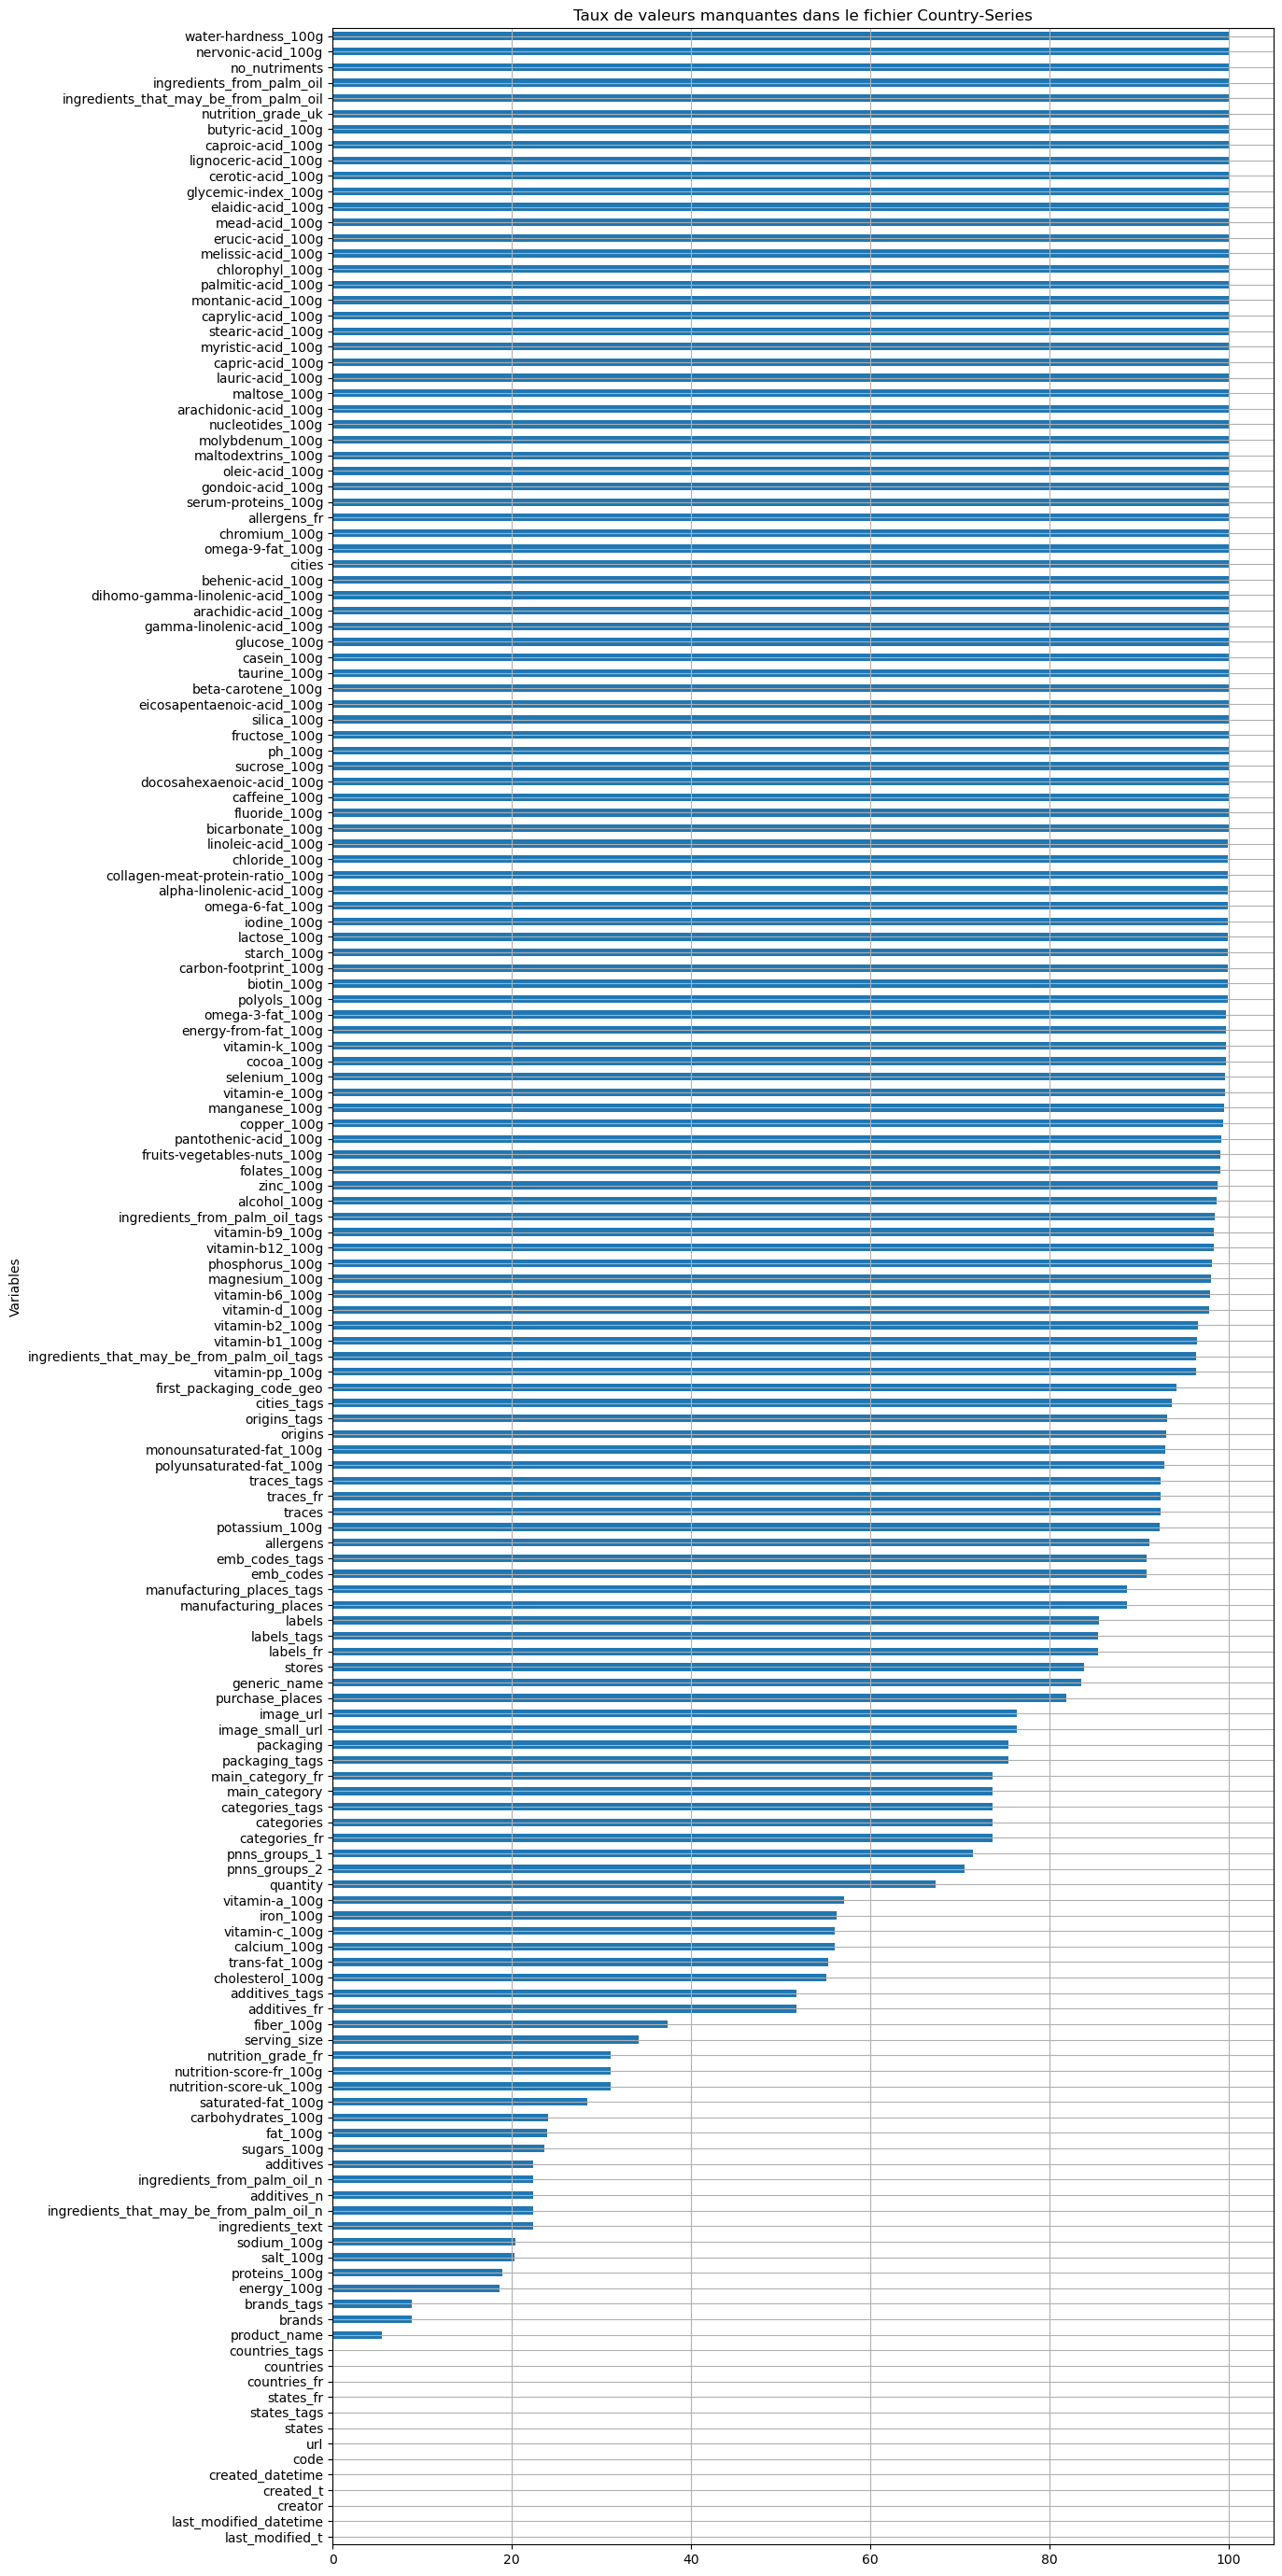

In [6]:
Pourcentage.sort_values(ascending=True).plot(kind='barh',figsize=(13, 35))
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Country-Series")
plt.grid()
plt.show()

In [7]:
# Vérification du taux valeurs manquantes totales du tableau
Totnull=(Pourcentage.sum()/datafood.shape[1])
Totnull

76.22157263195135

In [8]:
datafood.shape

(320772, 162)

In [9]:
# Supprimez les colonnes vides 
datafood = datafood.dropna(thresh=2,axis=1)
datafood.shape

(320772, 141)

In [10]:
# Vérification du taux valeurs manquantes totales après suppression
Pourcentage = (datafood.isnull().sum() /len(datafood))*100
Pourcentage
Totnull=(Pourcentage.sum()/datafood.shape[1])
Totnull

72.6801157809621

In [11]:
# Vérification des valeurs manquantes par ligne
datafood.isnull().sum(axis=1).sum()

32872382

In [12]:
datafood.duplicated('code').sum()

133

In [14]:
datafood=datafood.sort_values('last_modified_datetime',ascending=False)
datafood.shape

(320772, 141)

In [16]:
#Suppression des doublons selon la colonne "code"
datafood.drop_duplicates(subset="code",keep='last',inplace=True)

In [17]:
datafood.shape

(320639, 141)

99358